In [96]:
#import House sales data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')
df = pd.DataFrame(data)
print(df.shape)

#remove non-numeric column data
num = df.select_dtypes(include=[np.number]).dropna(axis=1) 
print(num.shape)

(1460, 81)
(1460, 35)


In [98]:
#build model
i_corr = num.corr()['SalePrice'].sort_values(ascending=False)[1:num.size]
print(i_corr.size)
#check if absolute value changes order of most correlated
abs_corr = abs(num.corr()['SalePrice']).sort_values(ascending=False)[1:40]
#print(abs_corr)

# get IDs of most correlated
# cols = i_corr.index[0:10] 

34


In [103]:
#assess model, deploy model

#for i in range(1,37): #check variables to see if they improve - kept improving
cols = i_corr.index[0:i_corr.size]
print(len(num))

#create data set for model training
X = num[cols]
X = X[0:len(num)-25]
Y = num['SalePrice'][0:len(num)-25]
print(len(Y))

#create model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)
print(f"R^2 is: {model.score(X,Y)}")


1460
1435
R^2 is: 0.8088471172804269


(25, 34)


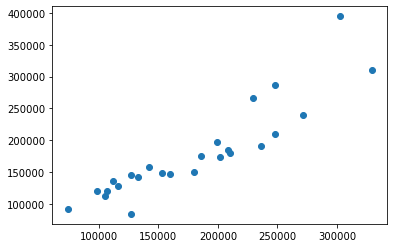

In [105]:
import matplotlib.pyplot as plt
#plt.scatter(predictions, Y)

#check on remaining 24 rows
tester = num[cols][len(num)-25:len(num)]
print(tester.shape)

tester_y = num['SalePrice'][len(num)-25:len(num)]
test_train = model.predict(tester)
plt.scatter(test_train,tester_y)

(460, 34)


(array([ 15., 114., 153., 121.,  44.,   9.,   2.,   1.,   0.,   1.]),
 array([  3709.58224802,  67066.65781135, 130423.73337469, 193780.80893803,
        257137.88450136, 320494.9600647 , 383852.03562803, 447209.11119137,
        510566.1867547 , 573923.26231804, 637280.33788137]),
 <BarContainer object of 10 artists>)

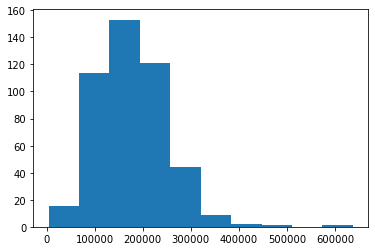

In [106]:
psetData = pd.read_csv('test.csv')
pset = pd.DataFrame(psetData)

#remove non-numeric columns and log transform
pset2 = pset.select_dtypes(include=[np.number])[cols].dropna(axis=1)
print(pset2.shape)
tryit = model.predict(pset2)

#create output dataframe
out = pd.DataFrame(pset['Id'])
out = out.assign(SalePrice = tryit)

out.to_csv("C:/Users/Laura C Chen/Desktop/1.00/PS2HouseDataExercise/predicted_prices.csv",index=False)
                
#check histogram
plt.hist(tryit)